#Phân tích tình hình kinh doanh của **GoChip**


###Thêm thư viện và dữ liệu

####Thêm các thư viện cần thiết

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

####Thêm dữ liệu từ drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data = '/content/drive/MyDrive/Visualization/data-215.xlsx'
df = pd.read_excel(data, sheet_name='data')

Mounted at /content/drive


In [ ]:
data1 = '/content/drive/MyDrive/Visualization/RFM.xlsx'
RFM = pd.read_excel(data1)

In [ ]:
RFM

,Client Segment,RFM,Behavior,Potential Strategies
0,Champion,"555, 554, 544, 545, 454, 455, 445.",Completed a recent purchase. They buy frequent...,Reward them. Can be early adopters of new prod...
1,Loyal Customer,"543, 444, 435, 355, 354, 345, 344, 335.",They buy frequently and spend a lot of money o...,Upsell. Offer high-value items to them. Ask th...
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4...",They recently spent a fair amount of money on ...,Invite them to join a loyalty program or to ge...
3,New Customer,"512, 511, 422, 421 412, 411, 311.","Completed a recent purchase, but doesn’t order...",Support them on their onboarding process. Get ...
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42...","Completed a recent purchase, but didn’t spend ...","Create brand awareness. Offer discounts, gifts..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324.","Above average in recency, frequency and moneta...",Launch limited-time offers and recommendations...
6,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113 .","Completed huge, frequent purchases long ago bu...",Get them back with new product launches. Don’t...
7,About To Sleep,"331, 321, 312, 221, 213.","Below average in recency, frequency and moneta...",Share useful information. Recommend popular pr...
8,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2...","Completed big, frequent purchases long ago. Yo...",Send personalized emails to reconnect with spe...
9,Hibernating,"332, 322, 231, 241, 251, 233, 232, 223, 222, 1...",Their last purchase was long ago. The number o...,Offer relevant products and special discounts....


In [ ]:
display(df)

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Chi phí,Lợi nhuận
0,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN01,Bánh gấu thái lan nhân SCL,3,65000,195000,100500,94500
1,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN02,Bánh gấu mix 3 vị,3,79000,237000,109500,127500
2,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN03,Bánh ngói hạnh nhân,4,99000,396000,206000,190000
3,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BIM,Bim Bim,BIM01,Bắp rim bò lá chanh,1,54000,54000,28500,25500
4,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BIM,Bim Bim,BIM02,Cơm cháy lắc khô gà,1,58000,58000,28500,29500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400362,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO01,Thanh cơm gạo lứt chà bông,1,65000,65000,34500,30500
400363,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO02,Thanh cơm gạo lứt mix hạt,4,65000,260000,138000,122000
400364,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO03,Thanh cơm gạo lứt rong biển,1,65000,65000,34500,30500
400365,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO05,Ngũ cốc granola vị socola,3,119000,357000,163500,193500


###Tiền xử lý dữ liệu

####Thông tin các cột

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400367 entries, 0 to 400366
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Thời gian tạo đơn           400367 non-null  object
 1   Mã đơn hàng                 400367 non-null  object
 2   Mã khách hàng               400367 non-null  object
 3   Tên khách hàng              158751 non-null  object
 4   Mã PKKH                     400367 non-null  object
 5   Mô tả Phân Khúc Khách hàng  400367 non-null  object
 6   Mã nhóm hàng                400367 non-null  object
 7   Tên nhóm hàng               400367 non-null  object
 8   Mã mặt hàng                 400367 non-null  object
 9   Tên mặt hàng                400367 non-null  object
 10  SL                          400367 non-null  int64 
 11  Đơn giá                     400367 non-null  int64 
 12  Thành tiền                  400367 non-null  int64 
 13  Chi phí                     4

####Chuyển kiểu dữ liệu của cột 'Thời gian tạo đơn'

In [ ]:
df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])

####Tạo thêm các cột khác từ cột 'Thời gian tạo đơn'

In [ ]:
#Tháng trong năm
df['Tháng'] = df['Thời gian tạo đơn'].dt.month

#Ngày trong tháng
df['Ngày trong tháng'] = df['Thời gian tạo đơn'].dt.day

#Ngày trong tuần
df['Ngày trong tuần'] = df['Thời gian tạo đơn'].dt.dayofweek
df['Ngày trong tuần'] = df['Ngày trong tuần'].map({0: 'Thứ 2', 1: 'Thứ 3', 2: 'Thứ 4', 3: 'Thứ 5', 4: 'Thứ 6', 5: 'Thứ 7', 6: 'Chủ Nhật'})

#Khung giờ
hour_range = [f'{i:02d}:00-{i:02d}:59' for i in range(24)]
df['Khung giờ'] = pd.cut(df['Thời gian tạo đơn'].dt.hour, bins=range(0, 25), labels=hour_range, right=False)


####Hiển thị DataFrame mới

In [ ]:
display(df)

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Chi phí,Lợi nhuận,Tháng,Ngày trong tháng,Ngày trong tuần,Khung giờ
0,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN01,Bánh gấu thái lan nhân SCL,3,65000,195000,100500,94500,1,1,Thứ 7,08:00-08:59
1,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN02,Bánh gấu mix 3 vị,3,79000,237000,109500,127500,1,1,Thứ 7,08:00-08:59
2,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN03,Bánh ngói hạnh nhân,4,99000,396000,206000,190000,1,1,Thứ 7,08:00-08:59
3,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BIM,Bim Bim,BIM01,Bắp rim bò lá chanh,1,54000,54000,28500,25500,1,1,Thứ 7,08:00-08:59
4,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BIM,Bim Bim,BIM02,Cơm cháy lắc khô gà,1,58000,58000,28500,29500,1,1,Thứ 7,08:00-08:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400362,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO01,Thanh cơm gạo lứt chà bông,1,65000,65000,34500,30500,12,31,Thứ 7,23:00-23:59
400363,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO02,Thanh cơm gạo lứt mix hạt,4,65000,260000,138000,122000,12,31,Thứ 7,23:00-23:59
400364,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO03,Thanh cơm gạo lứt rong biển,1,65000,65000,34500,30500,12,31,Thứ 7,23:00-23:59
400365,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO05,Ngũ cốc granola vị socola,3,119000,357000,163500,193500,12,31,Thứ 7,23:00-23:59


##Phân tích

###Phân tích các khía cạnh về Thị trường và Hành vi mua của Khách hàng

####Phân tích Quy mô Thị trường, Khách hàng, Doanh thu

#####Doanh thu theo tháng

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def DoanhThu(df, cot_x, bd, rotation=90,y='Thành tiền'):
    bd_mapping = {
        'bar': plt.bar,
        'line': plt.plot,
        'barh': plt.barh
    }
    if bd in bd_mapping:
        doanh_thu = df.groupby(cot_x)[y].sum().reset_index()
        plt.figure(figsize=(8,5))
        bd_mapping[bd](range(len(doanh_thu)), doanh_thu[y])  # Sử dụng range(len()) thay cho doanh_thu[cot_x]
        plt.xlabel(cot_x)
        plt.ylabel('Doanh thu (VNĐ)')
        plt.title(f'Doanh thu theo {cot_x}')
        def format_so(x, pos):
            if x >= 1e9:
                return f'{x / 1e9:.0f}B'
            elif x >= 1e6:
                return f'{x / 1e6:.0f}M'
            else:
                return f'{x:,.0f}'

        if bd=='barh':
            plt.xlabel('Doanh thu (VNĐ)')
            plt.ylabel(cot_x)
            plt.gca().xaxis.set_major_formatter(FuncFormatter(format_so))
            plt.yticks(range(len(doanh_thu)), doanh_thu[cot_x])
        else:
            plt.gca().yaxis.set_major_formatter(FuncFormatter(format_so))
            plt.xticks(rotation=rotation, ha='right')
            plt.xticks(range(len(doanh_thu)), doanh_thu[cot_x])

        df_bang = pd.DataFrame({cot_x: doanh_thu[cot_x], 'Doanh thu (VNĐ)': doanh_thu[y]})
        display(df_bang)

        plt.tight_layout()
        plt.show()

,Tháng,Doanh thu (VNĐ)
0,1,3705896000
1,2,2495254000
2,3,2193859000
3,4,2489614000
4,5,4329312000
5,6,7291747000
6,7,6601146000
7,8,4813358000
8,9,4744978000
9,10,19728913000


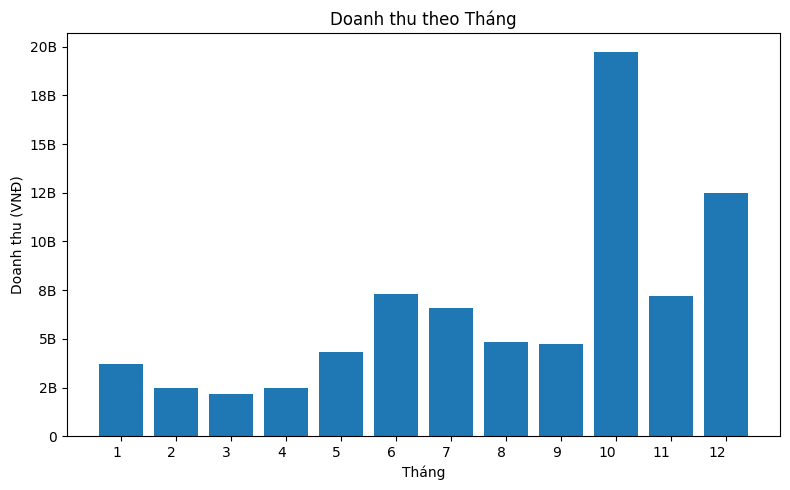

In [ ]:
DoanhThu(df, 'Tháng','bar',rotation=0,y='Thành tiền')

#####Doanh thu theo Ngày trong Tháng

,Ngày trong tháng,Doanh thu (VNĐ)
0,1,2475113000
1,2,2553828000
2,3,2549075000
3,4,2592820000
4,5,2365847000
5,6,2557504000
6,7,2574089000
7,8,2590968000
8,9,2649857000
9,10,2505792000


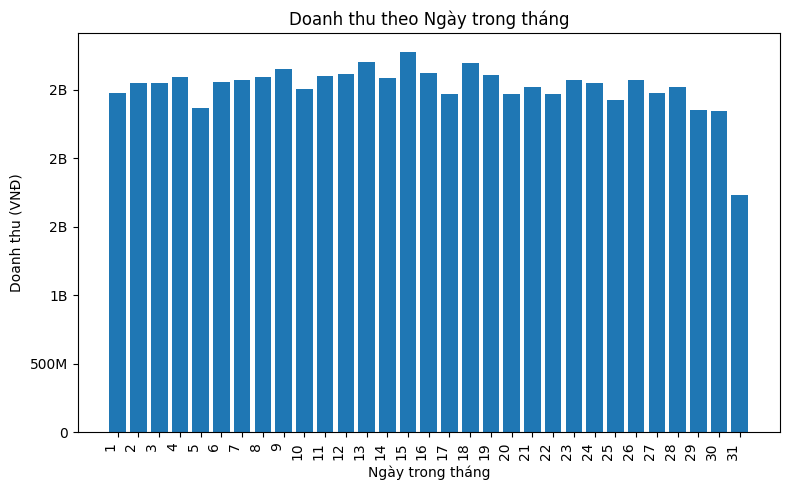

In [ ]:
DoanhThu(df, 'Ngày trong tháng', 'bar')

#####Doanh thu theo ngày trong tuần

,Ngày trong tuần,Doanh thu (VNĐ)
0,Chủ Nhật,11997950000
1,Thứ 2,10418692000
2,Thứ 3,10173352000
3,Thứ 4,10529999000
4,Thứ 5,11022246000
5,Thứ 6,11594329000
6,Thứ 7,12379908000


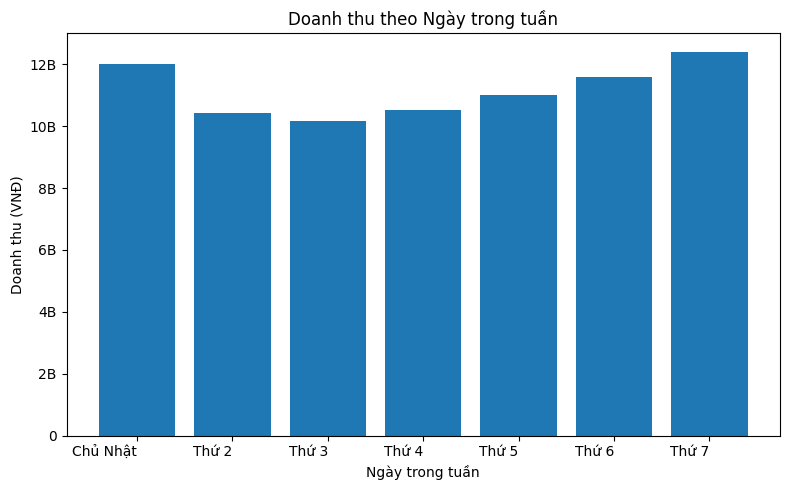

In [ ]:
DoanhThu(df, 'Ngày trong tuần', 'bar', rotation=0)

#####Doanh thu theo Khung giờ

,Khung giờ,Doanh thu (VNĐ)
0,00:00-00:59,0
1,01:00-01:59,0
2,02:00-02:59,0
3,03:00-03:59,0
4,04:00-04:59,0
5,05:00-05:59,0
6,06:00-06:59,0
7,07:00-07:59,0
8,08:00-08:59,4483625000
9,09:00-09:59,4788409000


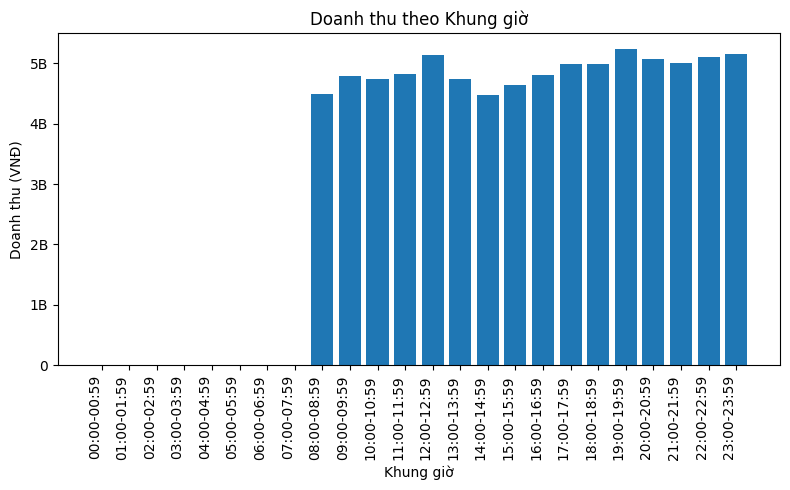

In [ ]:
DoanhThu(df, 'Khung giờ', 'bar')

#####Doanh thu theo Mã phân khúc khách hàng

,Mã PKKH,Doanh thu (VNĐ)
0,A1,9961580000
1,A2,8720446000
2,A3,12128299000
3,B1,10652057000
4,B2,18807130000
5,B3,13954458000
6,C1,947397000
7,C2,2359526000
8,C3,585583000


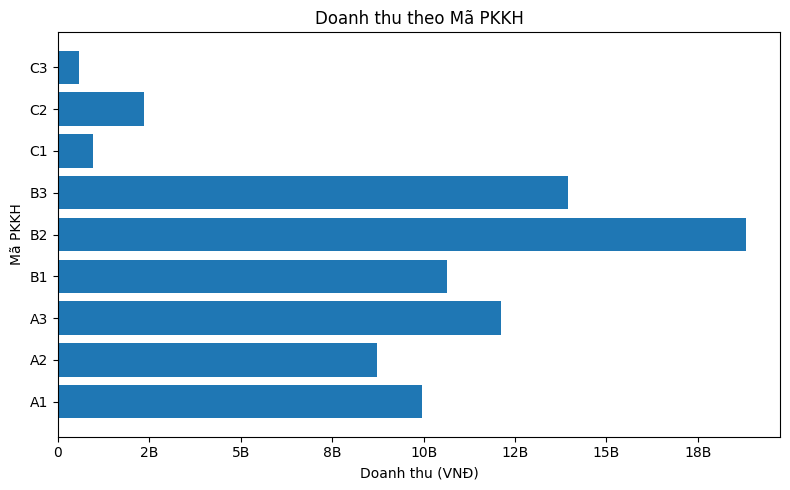

In [ ]:
DoanhThu(df, 'Mã PKKH','barh')

####Phân tích Hành vi mua lặp lại và Hành vi mua mới của từng phân khúc khách hàng.

#####Tỷ lệ mua mới và mua lặp lại

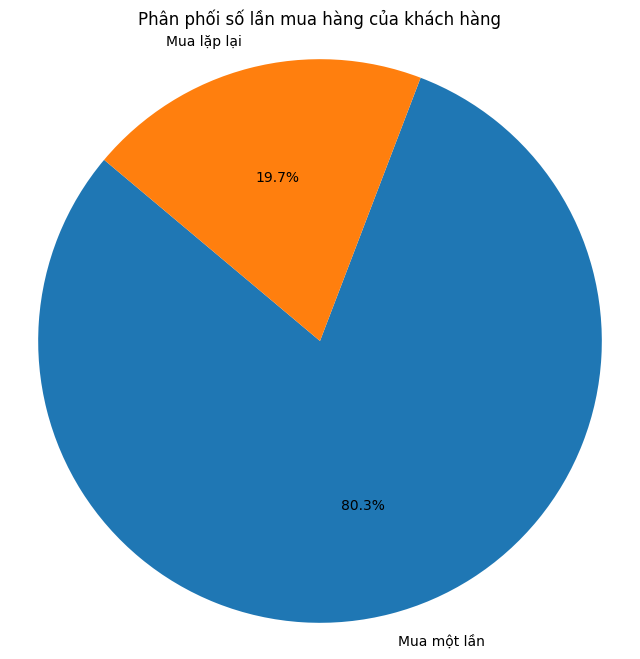

In [ ]:
import matplotlib.pyplot as plt

# Tính số lần mua của từng khách hàng
so_lan_mua = df.groupby(['Mã khách hàng'])['Mã đơn hàng'].nunique()

# Chuyển đổi số lần mua thành 'Mua một lần' hoặc 'Mua nhiều lần'
so_lan_mua = so_lan_mua.apply(lambda x: 'Mua một lần' if x == 1 else 'Mua lặp lại')

# Đếm số lượng trong từng nhóm
histogram = so_lan_mua.value_counts()

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(histogram, labels=histogram.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối số lần mua hàng của khách hàng')
plt.axis('equal')
plt.show()


#####Phân phối mức độ mua lại của khách hàng

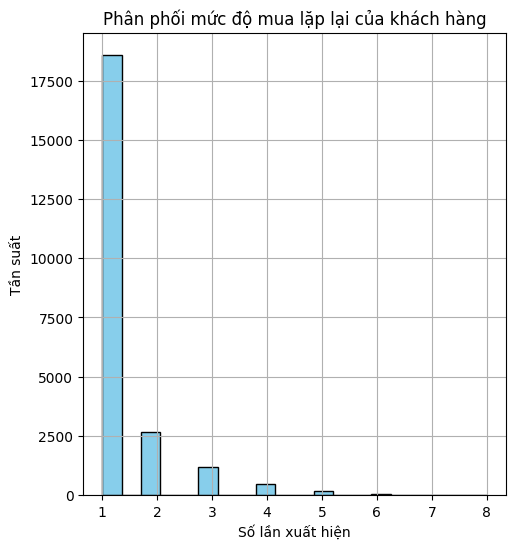

In [ ]:
import matplotlib.pyplot as plt

# Đếm số lần xuất hiện của mỗi mã khách hàng
so_lan_mua = df.groupby(['Mã khách hàng'])['Mã đơn hàng'].nunique()

# Vẽ biểu đồ histogram
plt.figure(figsize=(12, 6))

# Biểu đồ histogram cho tất cả các khách hàng
plt.subplot(1, 2, 1)
plt.hist(so_lan_mua, bins=20, color='skyblue', edgecolor='black')
plt.title('Phân phối mức độ mua lặp lại của khách hàng')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Tần suất')
plt.grid(True)



#####Số lần mua của các nhóm khách hàng.

In [ ]:
import pandas as pd

# Lọc bỏ các dòng trùng lặp dựa trên 'Mã đơn hàng'
unique_orders = df.drop_duplicates(subset=['Mã đơn hàng'])

# Tính số lần mua của mỗi khách hàng cho mỗi PKKH
customer_purchase_frequency = unique_orders.groupby(['Mã PKKH', 'Mã khách hàng']).size().reset_index(name='Số lần mua')

# Tính số lần mua lặp lại của từng khách hàng cho mỗi PKKH
frequency_pivot = customer_purchase_frequency.pivot_table(index='Mã PKKH',
                                                          columns='Số lần mua',
                                                          values='Mã khách hàng',
                                                          aggfunc='count').fillna(0)

# Đổi tên cột
frequency_pivot.columns = ['Mua ' + str(i) + ' lần' for i in range(1, frequency_pivot.shape[1] + 1)]

# Reset index để làm sạch bảng
frequency_pivot.reset_index(inplace=True)

display(frequency_pivot)


,Mã PKKH,Mua 1 lần,Mua 2 lần,Mua 3 lần,Mua 4 lần,Mua 5 lần,Mua 6 lần,Mua 7 lần,Mua 8 lần
0,A1,2026.0,439.0,319.0,158.0,76.0,25.0,8.0,2.0
1,A2,1500.0,533.0,235.0,107.0,33.0,3.0,2.0,0.0
2,A3,2644.0,415.0,186.0,64.0,23.0,2.0,0.0,0.0
3,B1,3374.0,424.0,192.0,77.0,28.0,6.0,1.0,0.0
4,B2,2904.0,370.0,133.0,50.0,8.0,4.0,0.0,0.0
5,B3,2116.0,258.0,81.0,15.0,5.0,0.0,0.0,0.0
6,C1,1055.0,24.0,5.0,1.0,0.0,0.0,0.0,0.0
7,C2,2271.0,170.0,49.0,9.0,2.0,0.0,0.0,0.0
8,C3,685.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0


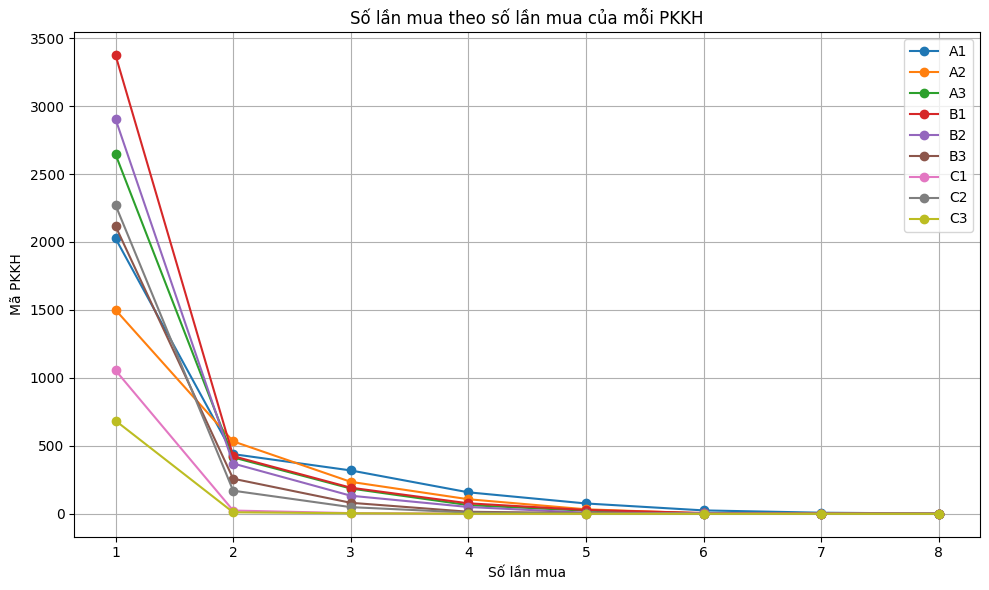

In [ ]:
plt.figure(figsize=(10, 6))

# Lặp qua từng Mã PKKH và vẽ đường line tương ứng
for i, row in frequency_pivot.iterrows():
    plt.plot(range(1, 9), row[1:], marker='o', label=row['Mã PKKH'])

plt.xlabel('Số lần mua')
plt.ylabel('Mã PKKH')
plt.title('Số lần mua theo số lần mua của mỗi PKKH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####Phân nhóm khách hàng theo phương pháp RFM

#####Tạo các giá trị Recency, Frequency, Monetary

In [ ]:
# Tính Recency
last_order_time = df['Thời gian tạo đơn'].max()
recency_df = df.groupby('Mã khách hàng')['Thời gian tạo đơn'].max().reset_index()
recency_df['Recency'] = (last_order_time - recency_df['Thời gian tạo đơn']).dt.days
recency_df = recency_df[['Mã khách hàng', 'Recency']]

# Tính Frequency
frequency_df = df.groupby('Mã khách hàng')['Mã đơn hàng'].nunique().reset_index()
frequency_df.columns = ['Mã khách hàng', 'Frequency']

# Tính Monetary
monetary_df = df.groupby('Mã khách hàng')['Thành tiền'].sum().reset_index()
monetary_df.columns = ['Mã khách hàng', 'Monetary']

# Kết hợp các dataframe lại với nhau
rfm_df = pd.merge(recency_df, frequency_df, on='Mã khách hàng')
rfm_df = pd.merge(rfm_df, monetary_df, on='Mã khách hàng')

# Hiển thị kết quả
display(rfm_df)


,Mã khách hàng,Recency,Frequency,Monetary
0,CUZ00001,364,1,4464000
1,CUZ00002,364,1,991000
2,CUZ00003,364,1,773000
3,CUZ00004,75,4,9401000
4,CUZ00005,228,2,1410000
...,...,...,...,...
23127,CUZ23128,0,1,1420000
23128,CUZ23129,0,1,6630000
23129,CUZ23130,0,1,1000000
23130,CUZ23131,0,1,2338000


#####Tạo các cụm cho các chỉ số Recency, Frequency, Monetary

In [ ]:
from sklearn.cluster import KMeans

kmeans_Recency = KMeans(n_clusters=5)
kmeans_Recency.fit(rfm_df[['Recency']]) # fit với Recency

rfm_df['RecencyCluster'] = kmeans_Recency.predict(rfm_df[['Recency']]) # lưu vào cột RecencyCluster

rfm_df.groupby('RecencyCluster')['Recency'].describe() # Lấy thông tin của các cụm để thấy rằng các cụm chưa được sắp xếp

df_new = rfm_df.groupby('RecencyCluster')['Recency'].mean().reset_index() # Tạo cột lấy giá trị trung bình của các cụm

df_new = df_new.sort_values(by='Recency', ascending=False).reset_index(drop=True) # Sắp xếp lại các nhóm dựa trên giá trị trung bình "Recency" giảm dần.

df_new['index'] = df_new.index # Tạo thêm 1 cột tên 'index' để có thứ tự tăng dần từ 0 đến 4

rfm_df = pd.merge(rfm_df, df_new[['RecencyCluster', 'index']], on='RecencyCluster') # Thêm cột index và RecencyCluster vào rfm_df
rfm_df = rfm_df.drop(['RecencyCluster'], axis=1) # Bỏ cột RecencyCluster, không biết là khúc trên đừng thêm cột RecencyCluster vào rfm_df thì có được không

rfm_df = rfm_df.rename(columns={'index': 'RecencyCluster'}) # Đổi tên cột 'index' thành 'RecencyCluster'
rfm_df['RecencyCluster'] = rfm_df['RecencyCluster'].replace({0: 1, 1: 2, 2: 3, 3: 4, 4: 5}) # Thay thế giá trị từ 0 đến 4 của index thành 1 đến 5 cho dễ hình dung số thứ tự của cụm
rfm_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Mã khách hàng,Recency,Frequency,Monetary,RecencyCluster
0,CUZ00001,364,1,4464000,1
1,CUZ00002,364,1,991000,1
2,CUZ00003,364,1,773000,1
3,CUZ00006,364,1,3868000,1
4,CUZ00007,364,1,1006000,1
...,...,...,...,...,...
23127,CUZ13398,138,1,439000,3
23128,CUZ13399,138,1,919000,3
23129,CUZ13400,138,1,1325000,3
23130,CUZ13401,138,1,924000,3


In [ ]:
kmeans_Recency = KMeans(n_clusters=5)
kmeans_Recency.fit(rfm_df[['Frequency']]) # fit với Recency

rfm_df['FrequencyCluster'] = kmeans_Recency.predict(rfm_df[['Frequency']]) # lưu vào cột FrequencyCluster

rfm_df.groupby('FrequencyCluster')['Frequency'].describe() # Lấy thông tin của các cụm để thấy rằng các cụm chưa được sắp xếp

df_new = rfm_df.groupby('FrequencyCluster')['Frequency'].mean().reset_index() # Tạo cột lấy giá trị trung bình của các cụm

df_new = df_new.sort_values(by='Frequency', ascending=True).reset_index(drop=True) # Sắp xếp lại các nhóm dựa trên giá trị trung bình "Frequency" tăng dần.

df_new['index'] = df_new.index # Tạo thêm 1 cột tên 'index' để có thứ tự tăng dần từ 0 đến 4

rfm_df = pd.merge(rfm_df, df_new[['FrequencyCluster', 'index']], on='FrequencyCluster') # Thêm cột index và FrequencyCluster vào rfm_df

rfm_df = rfm_df.drop(['FrequencyCluster'], axis=1) # FrequencyCluster, không biết là khúc trên đừng thêm cột FrequencyCluster vào rfm_df thì có được không

rfm_df = rfm_df.rename(columns={'index': 'FrequencyCluster'}) # Đổi tên cột 'index' thành 'FrequencyCluster'
rfm_df['FrequencyCluster'] = rfm_df['FrequencyCluster'].replace({0: 1, 1: 2, 2: 3, 3: 4, 4: 5}) # Thay thế giá trị từ 0 đến 4 của index thành 1 đến 5 cho dễ hình dung số thứ tự của cụm
rfm_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Mã khách hàng,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster
0,CUZ00001,364,1,4464000,1,1
1,CUZ00002,364,1,991000,1,1
2,CUZ00003,364,1,773000,1,1
3,CUZ00006,364,1,3868000,1,1
4,CUZ00007,364,1,1006000,1,1
...,...,...,...,...,...,...
23127,CUZ01239,140,5,11838000,3,5
23128,CUZ02232,202,5,10268000,3,5
23129,CUZ02361,159,5,4544000,3,5
23130,CUZ02910,161,5,7437000,3,5


In [ ]:
kmeans_Recency = KMeans(n_clusters=5)
kmeans_Recency.fit(rfm_df[['Monetary']]) # fit với Recency

rfm_df['MonetaryCluster'] = kmeans_Recency.predict(rfm_df[['Monetary']]) # lưu vào cột MonetaryCluster

rfm_df.groupby('MonetaryCluster')['Monetary'].describe() # Lấy thông tin của các cụm để thấy rằng các cụm chưa được sắp xếp

df_new = rfm_df.groupby('MonetaryCluster')['Monetary'].mean().reset_index() # Tạo cột lấy giá trị trung bình của các cụm

df_new = df_new.sort_values(by='Monetary', ascending=True).reset_index(drop=True) # Sắp xếp lại các nhóm dựa trên giá trị trung bình "Monetary" tăng dần.

df_new['index'] = df_new.index # Tạo thêm 1 cột tên 'index' để có thứ tự tăng dần từ 0 đến 4

rfm_df = pd.merge(rfm_df, df_new[['MonetaryCluster', 'index']], on='MonetaryCluster') # Thêm cột index và MonetaryCluster vào rfm_df

rfm_df = rfm_df.drop(['MonetaryCluster'], axis=1) # Bỏ cột MonetaryCluster, không biết là khúc trên đừng thêm cột MonetaryCluster vào rfm_df thì có được không

rfm_df = rfm_df.rename(columns={'index': 'MonetaryCluster'}) # Đổi tên cột 'index' thành 'MonetaryCluster'
rfm_df['MonetaryCluster'] = rfm_df['MonetaryCluster'].replace({0: 1, 1: 2, 2: 3, 3: 4, 4: 5}) # Thay thế giá trị từ 0 đến 4 của index thành 1 đến 5 cho dễ hình dung số thứ tự của cụm
rfm_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Mã khách hàng,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster
0,CUZ00001,364,1,4464000,1,1,2
1,CUZ00006,364,1,3868000,1,1,2
2,CUZ00010,364,1,2904000,1,1,2
3,CUZ00012,364,1,3933000,1,1,2
4,CUZ00017,364,1,2758000,1,1,2
...,...,...,...,...,...,...,...
23127,CUZ03829,51,6,26816000,5,5,5
23128,CUZ07302,7,5,38673000,5,5,5
23129,CUZ08483,6,6,24979000,5,5,5
23130,CUZ08543,47,5,25487000,5,5,5


#####Tạo Mã và Tên PKKH mới theo RFM

In [ ]:
rfm_df['Mã PKKH (RFM)'] = rfm_df['RecencyCluster'].astype(str) + rfm_df['FrequencyCluster'].astype(str) + rfm_df['MonetaryCluster'].astype(str)
rfm_df

,Mã khách hàng,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,Mã PKKH (RFM)
0,CUZ00001,364,1,4464000,1,1,2,112
1,CUZ00006,364,1,3868000,1,1,2,112
2,CUZ00010,364,1,2904000,1,1,2,112
3,CUZ00012,364,1,3933000,1,1,2,112
4,CUZ00017,364,1,2758000,1,1,2,112
...,...,...,...,...,...,...,...,...
23127,CUZ03829,51,6,26816000,5,5,5,555
23128,CUZ07302,7,5,38673000,5,5,5,555
23129,CUZ08483,6,6,24979000,5,5,5,555
23130,CUZ08543,47,5,25487000,5,5,5,555


In [ ]:
rfm_df['Tên PKKH (RFM)'] = pd.Series()

for index1, row1 in rfm_df['Mã PKKH (RFM)'].items():
    for index3, row3 in RFM['RFM'].items():
        if row1 in row3:
            rfm_df.at[index1,'Tên PKKH (RFM)'] = RFM['Client Segment'][index3]

In [ ]:
rfm_df

,Mã khách hàng,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,Mã PKKH (RFM),Tên PKKH (RFM)
0,CUZ00001,364,1,4464000,1,1,2,112,Lost
1,CUZ00006,364,1,3868000,1,1,2,112,Lost
2,CUZ00010,364,1,2904000,1,1,2,112,Lost
3,CUZ00012,364,1,3933000,1,1,2,112,Lost
4,CUZ00017,364,1,2758000,1,1,2,112,Lost
...,...,...,...,...,...,...,...,...,...
23127,CUZ03829,51,6,26816000,5,5,5,555,Champion
23128,CUZ07302,7,5,38673000,5,5,5,555,Champion
23129,CUZ08483,6,6,24979000,5,5,5,555,Champion
23130,CUZ08543,47,5,25487000,5,5,5,555,Champion


#####Trực quan các phân khúc khách hàng

In [ ]:
!pip install squarify


        Tên PKKH (RFM)  Số lượng
0         New Customer     10824
1          Hibernating      3717
2                 Lost      3100
3            Promising      2091
4       About To Sleep      1404
5   Potential Loyalist      1344
6       Loyal Customer       248
7       Need Attention       201
8             Champion       184
9     Cannot Lose Them        12
10             At Risk         7


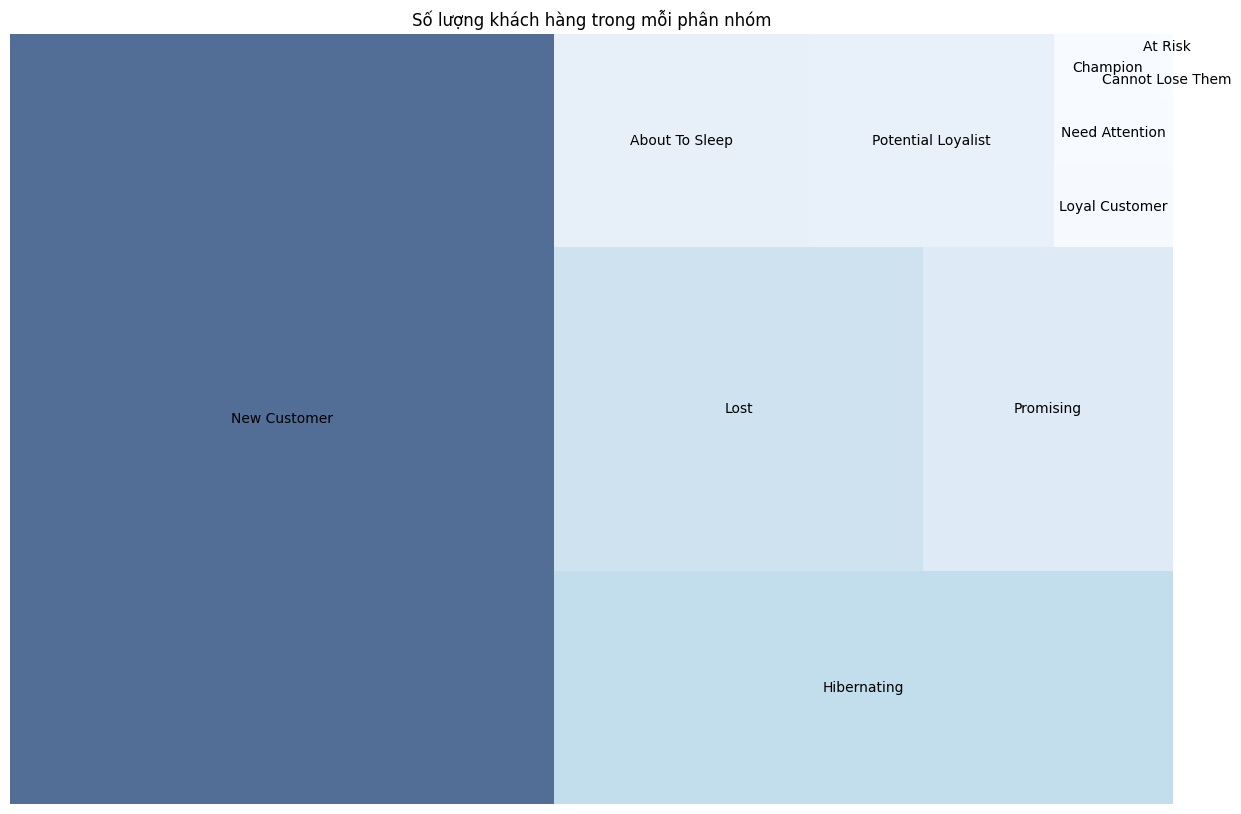

In [ ]:
import squarify
segment_counts = rfm_df['Tên PKKH (RFM)'].value_counts().reset_index()
segment_counts.columns = ['Tên PKKH (RFM)', 'Số lượng']
print(segment_counts)

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
squarify.plot(sizes=segment_counts['Số lượng'], label=segment_counts['Tên PKKH (RFM)'], alpha=0.7, color=plt.cm.Blues(segment_counts['Số lượng'] / max(segment_counts['Số lượng'])),text_kwargs={'fontsize':10})
plt.axis('off')
plt.title('Số lượng khách hàng trong mỗi phân nhóm')
plt.show()

In [ ]:
df

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Chi phí,Lợi nhuận,Tháng,Ngày trong tháng,Ngày trong tuần,Khung giờ
0,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN01,Bánh gấu thái lan nhân SCL,3,65000,195000,100500,94500,1,1,Thứ 7,08:00-08:59
1,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN02,Bánh gấu mix 3 vị,3,79000,237000,109500,127500,1,1,Thứ 7,08:00-08:59
2,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BAN,Bánh,BAN03,Bánh ngói hạnh nhân,4,99000,396000,206000,190000,1,1,Thứ 7,08:00-08:59
3,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BIM,Bim Bim,BIM01,Bắp rim bò lá chanh,1,54000,54000,28500,25500,1,1,Thứ 7,08:00-08:59
4,2022-01-01 08:03:25,ORD0000001,CUZ00001,Nguyễn Kim Tín,A3,"Người có thu nhập cao, có sở thích ăn vặt, chú...",BIM,Bim Bim,BIM02,Cơm cháy lắc khô gà,1,58000,58000,28500,29500,1,1,Thứ 7,08:00-08:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400362,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO01,Thanh cơm gạo lứt chà bông,1,65000,65000,34500,30500,12,31,Thứ 7,23:00-23:59
400363,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO02,Thanh cơm gạo lứt mix hạt,4,65000,260000,138000,122000,12,31,Thứ 7,23:00-23:59
400364,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO03,Thanh cơm gạo lứt rong biển,1,65000,65000,34500,30500,12,31,Thứ 7,23:00-23:59
400365,2022-12-31 23:54:21,ORD0030607,CUZ23132,NaN,B1,Nhân viên văn phòng thu nhập trung bình quan t...,NCO,Ngũ Cốc,NCO05,Ngũ cốc granola vị socola,3,119000,357000,163500,193500,12,31,Thứ 7,23:00-23:59


###Phân tích các khía cạnh về Hàng Hóa

####Phân tích hành vi mua theo Nhóm hàng

,Tên nhóm hàng,Doanh thu (VNĐ)
0,Bim Bim,9948255000
1,Bánh,6220068000
2,Bột củ sen,4047750000
3,Ngũ Cốc,34641340000
4,Đồ Khô,19961238000
5,Đồ uống,3297825000


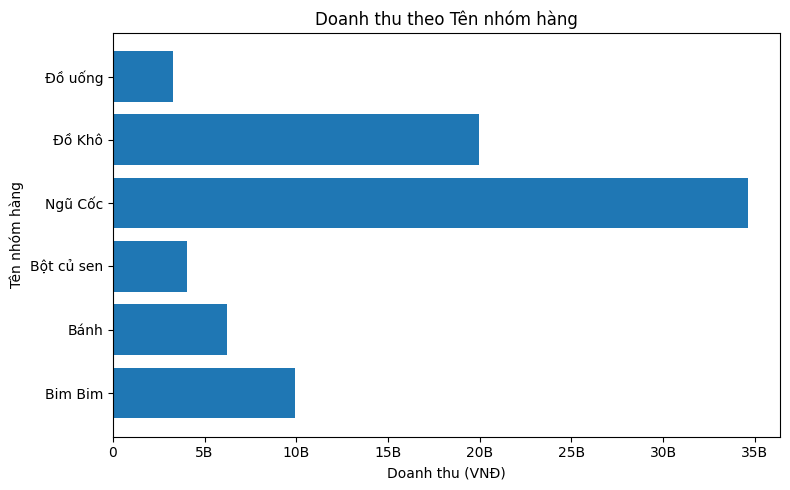

In [ ]:
DoanhThu(df, 'Tên nhóm hàng','barh')

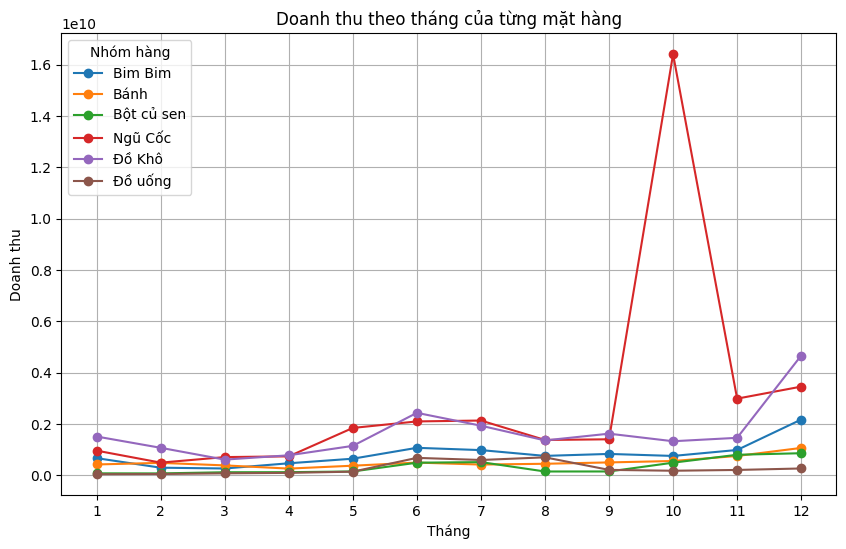

In [ ]:

# Nhóm dữ liệu theo 'Tháng' và 'Tên mặt hàng', tính tổng doanh thu cho mỗi nhóm
doanh_thu_theo_thang = df.groupby(['Tháng', 'Tên nhóm hàng'])['Thành tiền'].sum().unstack()

# Vẽ biểu đồ
doanh_thu_theo_thang.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Doanh thu theo tháng của từng mặt hàng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(doanh_thu_theo_thang.index)
plt.legend(title='Nhóm hàng', loc='upper left')
plt.grid(True)
plt.show()


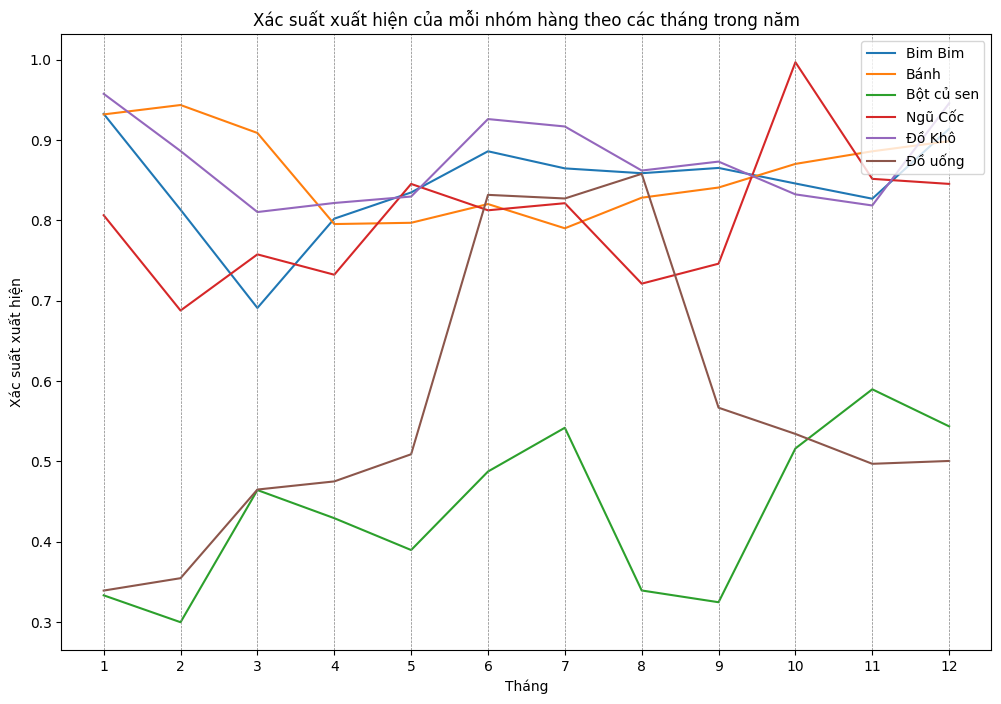

In [ ]:
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Thời gian tạo đơn' sang định dạng tháng
df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])
df['Tháng'] = df['Thời gian tạo đơn'].dt.month

# Đếm số lần mỗi nhóm hàng xuất hiện trong cột 'Tên nhóm hàng' dựa trên mã đơn hàng duy nhất cho mỗi tháng
group_counts_by_month = df.groupby(['Tháng', 'Tên nhóm hàng'])['Mã đơn hàng'].nunique()

# Tính tổng số mã đơn hàng cho mỗi tháng
total_orders_by_month = df.groupby('Tháng')['Mã đơn hàng'].nunique()

# Tính xác suất của mỗi nhóm hàng cho mỗi tháng
probabilities_by_month = group_counts_by_month / total_orders_by_month

# Vẽ biểu đồ đường so sánh xác suất xuất hiện của mỗi nhóm hàng theo các tháng trong năm
plt.figure(figsize=(12, 8))
for nhom_hang in probabilities_by_month.unstack().columns:
    plt.plot(probabilities_by_month.unstack()[nhom_hang], label=nhom_hang)

plt.xlabel('Tháng')
plt.ylabel('Xác suất xuất hiện')
plt.title('Xác suất xuất hiện của mỗi nhóm hàng theo các tháng trong năm')
plt.legend(loc='upper right')
plt.xticks(range(1, 13))

# Vẽ các đường vạch xác định mốc
for month in range(1, 13):
    plt.axvline(x=month, color='gray', linestyle='--', linewidth=0.5)

plt.show()


####Hành vi mua theo mặt hàng

Đối với Nhóm hàng [Đồ uống]:
Mặt hàng bán dễ nhất là Trà sữa ô long với xác xuất bán (mặt hàng/nhóm hàng) là 32.15%.
Mặt hàng bán khó nhất là Tàu hủ trân châu đường đen với xác xuất bán (mặt hàng/nhóm hàng) là 26.88%.

Đối với Nhóm hàng [Đồ Khô]:
Mặt hàng bán dễ nhất là Tóp mỡ rim mắm tỏi với xác xuất bán (mặt hàng/nhóm hàng) là 51.97%.
Mặt hàng bán khó nhất là Khô bò que hồng ngự với xác xuất bán (mặt hàng/nhóm hàng) là 41.12%.

Đối với Nhóm hàng [Bim Bim]:
Mặt hàng bán dễ nhất là Rong biển cháy tỏi với xác xuất bán (mặt hàng/nhóm hàng) là 64.98%.
Mặt hàng bán khó nhất là Me xí muội Thái Lan với xác xuất bán (mặt hàng/nhóm hàng) là 43.65%.

Đối với Nhóm hàng [Ngũ Cốc]:
Mặt hàng bán dễ nhất là Thanh cơm gạo lứt rong biển với xác xuất bán (mặt hàng/nhóm hàng) là 65.21%.
Mặt hàng bán khó nhất là Ngũ cốc granola vị matcha với xác xuất bán (mặt hàng/nhóm hàng) là 56.71%.

Đối với Nhóm hàng [Bột củ sen]:
Mặt hàng bán dễ nhất là Bột củ sen hòa tan dinh dưỡng không đường với xác xuất bán (mặt

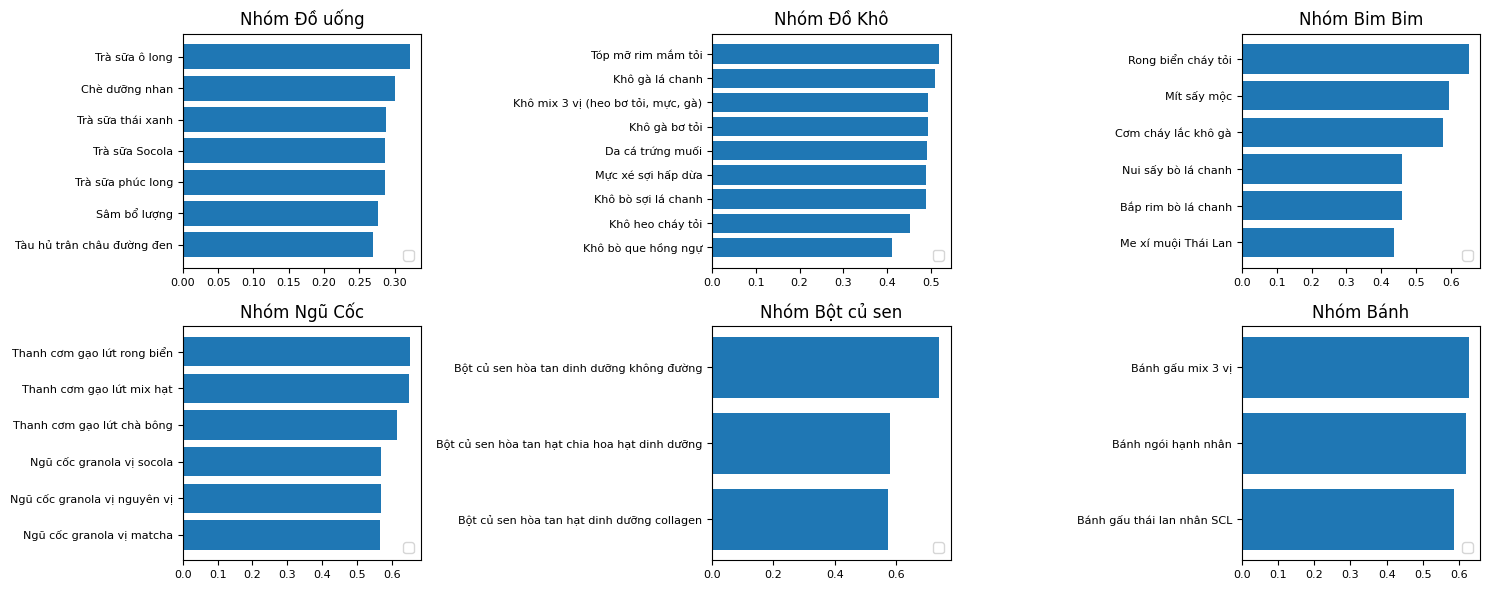

In [ ]:
import matplotlib.pyplot as plt

probabilities_per_item = df.groupby(['Tên nhóm hàng', 'Tên mặt hàng'])['Mã đơn hàng'].nunique() / df.groupby('Tên nhóm hàng')['Mã đơn hàng'].nunique()

probabilities_per_item_sorted = probabilities_per_item.sort_values(ascending=True)

selected_groups = probabilities_per_item_sorted.index.get_level_values(0).unique()[:7]

for group in selected_groups:
    group_data = probabilities_per_item_sorted.loc[group]

    if len(group_data) == 1:
        print(f"Đối với Nhóm hàng [{group}]:")
        print(f"Chỉ có 1 Mặt hàng duy nhất thuộc Nhóm hàng là: {group_data.index[0]}\n")
    else:
        easiest_item = group_data.idxmax()
        hardest_item = group_data.idxmin()

        print(f"Đối với Nhóm hàng [{group}]:")
        print(f"Mặt hàng bán dễ nhất là {easiest_item} với xác xuất bán (mặt hàng/nhóm hàng) là {round(group_data[easiest_item]*100, 2)}%.")
        print(f"Mặt hàng bán khó nhất là {hardest_item} với xác xuất bán (mặt hàng/nhóm hàng) là {round(group_data[hardest_item]*100, 2)}%.\n")

plt.figure(figsize=(15, 6))  # Điều chỉnh kích thước của hình vẽ
for i, group in enumerate(selected_groups):
    group_data = probabilities_per_item_sorted.loc[group]
    plt.subplot(2, 3, i+1)
    plt.barh(group_data.index, group_data.values)
    plt.title(f'Nhóm {group}')
    plt.legend()
    plt.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()
plt.show()

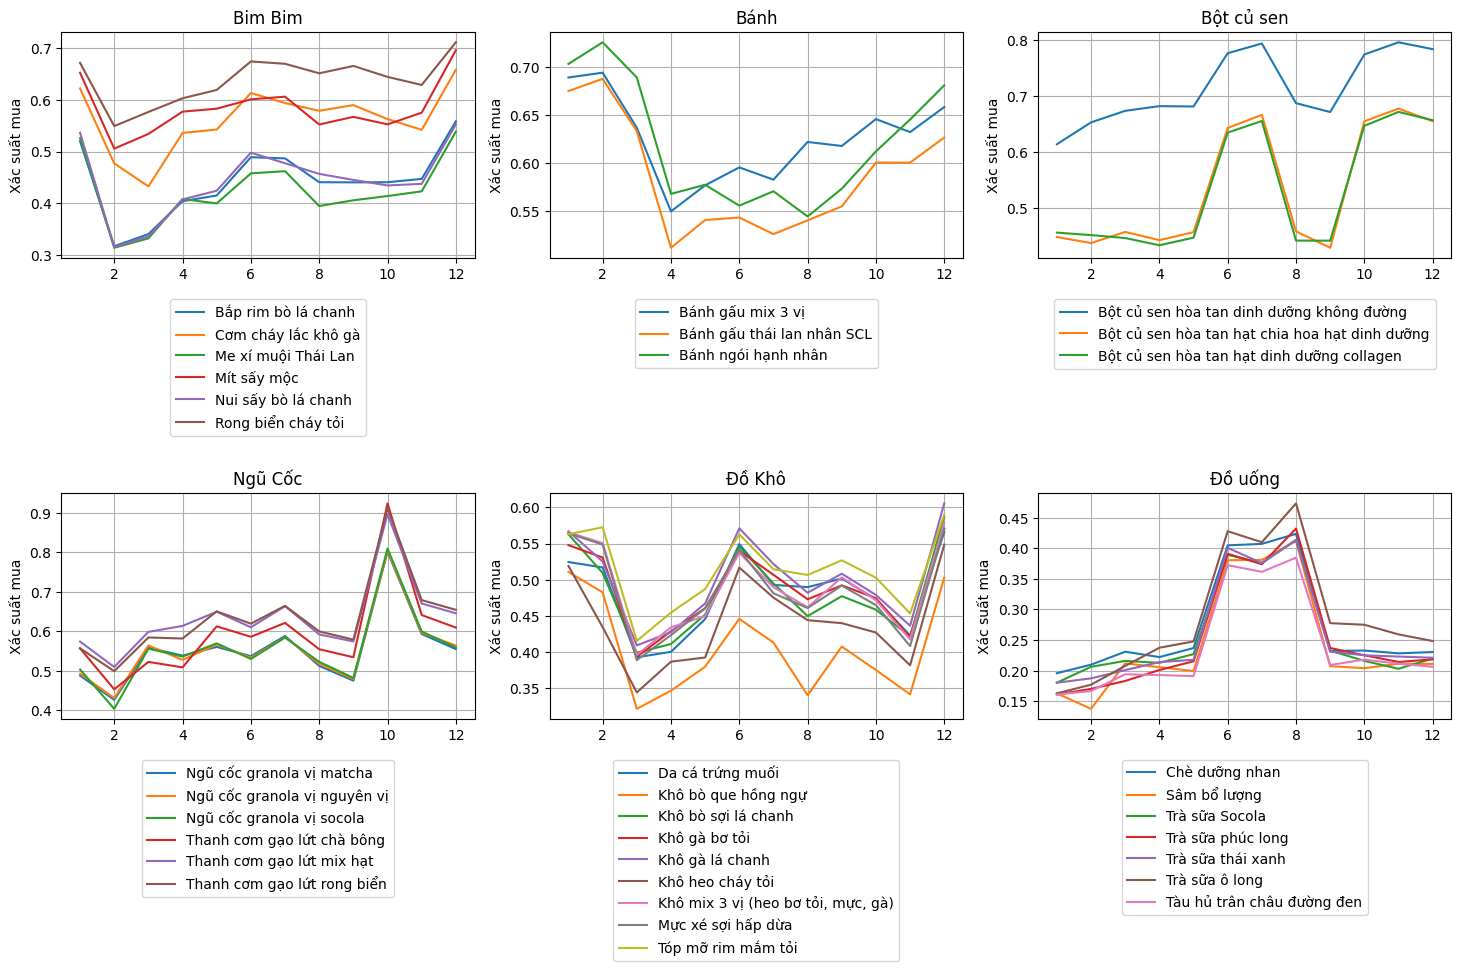

In [ ]:
import matplotlib.pyplot as plt

# Tính xác suất mua hàng của mỗi mặt hàng trong mỗi nhóm hàng theo từng tháng trong năm
probabilities_per_item_per_group_per_month = df.groupby(['Tháng', 'Tên nhóm hàng', 'Tên mặt hàng'])['Mã đơn hàng'].nunique() / df.groupby(['Tháng', 'Tên nhóm hàng'])['Mã đơn hàng'].nunique()

# Chuyển đổi kết quả thành DataFrame
probabilities_per_item_per_group_per_month_df = probabilities_per_item_per_group_per_month.reset_index()
probabilities_per_item_per_group_per_month_df.columns = ['Tháng', 'Tên nhóm hàng', 'Tên mặt hàng', 'Xác suất mua']

# Chia dữ liệu thành các nhóm theo nhóm hàng
grouped_data = probabilities_per_item_per_group_per_month_df.groupby('Tên nhóm hàng')

# Số lượng nhóm hàng
num_groups = len(grouped_data)

# Kích thước của subplot
num_rows = 2
num_cols = (num_groups + 1) // num_rows  # Số cột được tính dựa trên số nhóm hàng và số hàng

# Tạo subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Lặp qua từng nhóm hàng và vẽ biểu đồ cho từng nhóm hàng
for i, (nhom_hang, nhom_hang_data) in enumerate(grouped_data):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col]

    # Lặp qua từng mặt hàng trong nhóm hàng và vẽ biểu đồ cho từng mặt hàng
    for mat_hang in nhom_hang_data['Tên mặt hàng'].unique():
        mat_hang_data = nhom_hang_data[nhom_hang_data['Tên mặt hàng'] == mat_hang]
        ax.plot(mat_hang_data['Tháng'], mat_hang_data['Xác suất mua'], label=mat_hang)

    ax.set_ylabel('Xác suất mua')
    ax.set_title(nhom_hang)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
    ax.grid(True)

# Xoá các subplot không sử dụng
for i in range(num_groups, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


